<!-- Startup Sucess EDA -->

# StartUp Sucess- EDA

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
from tabulate import tabulate
!pip install folium
import folium



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# load data:
df = pd.read_csv('../data/startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
# remove duplicated columns:
df = df.drop(columns=["state_code.1"])
# remove meaningless columns:
df = df.drop(columns=["object_id", "id", "Unnamed: 6","Unnamed: 0"])

In [9]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)


['closed_at', 'age_first_milestone_year', 'age_last_milestone_year']


There are 3 columns with missing values. Two of those are 'age_first_milestone_year', 'age_last_milestone_year'. The companies that have no value in those columns also have 0 in milestones column. So, in order to deal with the missing values, we used a correlation matrix and we discovered that age_last_funding_year column has the highest correlation with 'age_first_milestone_year' & 'age_last_milestone_year'. (It make sense since one the company's milestones coulld be raising certain amount of money which could be done by funding).



age_first_milestone_year  skewness: 0.9444676662984656
age_last_milestone_year  skewness: 0.711933787802145
+-------+--------------------------+-------------------------+
|       | age_first_milestone_year | age_last_milestone_year |
+-------+--------------------------+-------------------------+
| count |          771.0           |          771.0          |
| mean  |    3.055353047989624     |    4.754422568093385    |
|  std  |    2.977057142897724     |    3.212107156209229    |
|  min  |         -14.1699         |         -7.0055         |
|  25%  |           1.0            |          2.411          |
|  50%  |          2.5205          |         4.4767          |
|  75%  |          4.6863          |         6.7534          |
|  max  |         24.6849          |         24.6849         |
+-------+--------------------------+-------------------------+


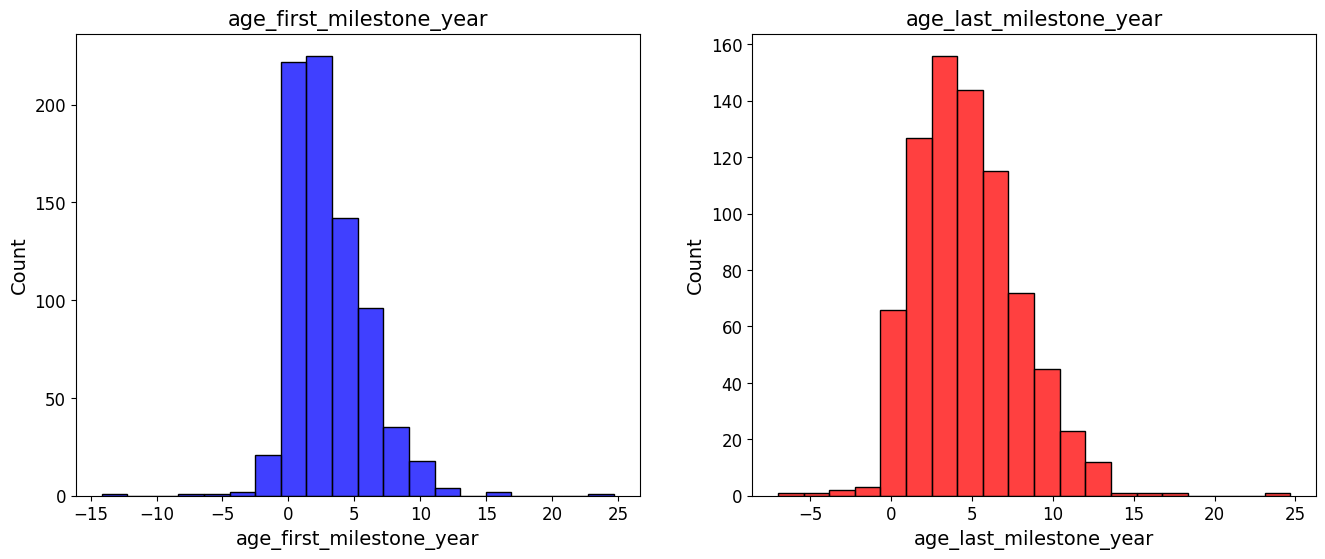

In [10]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In [11]:
#let's look for correlations for those columns.

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Find correlations with the columns containing missing values
correlations_first_milestone_age = correlation_matrix['age_first_milestone_year'].abs().sort_values(ascending=False)
correlations_age_last_milestone_year = correlation_matrix['age_last_milestone_year'].abs().sort_values(ascending=False)

# Print the correlations
print(correlations_first_milestone_age[correlations_first_milestone_age>0.5])
print(correlations_age_last_milestone_year[correlations_age_last_milestone_year>0.5])

# We see that last_funding_age is highly correlated with our columns.
# It could make sense since it's reasonable that one of a company's milestones is to raise certin amount of money which could
# be done by funding. 

age_first_milestone_year    1.000000
age_last_milestone_year     0.777484
age_last_funding_year       0.687515
age_first_funding_year      0.593526
Name: age_first_milestone_year, dtype: float64
age_last_milestone_year     1.000000
age_first_milestone_year    0.777484
age_last_funding_year       0.632099
Name: age_last_milestone_year, dtype: float64


In [12]:
from sklearn.impute import KNNImputer

# fill in the missing values using knn:

# Create a copy of the DataFrame with only the columns of interest 
columns_with_missing_values = ['age_first_milestone_year','age_last_milestone_year']
columns_of_interest = ['age_last_funding_year'] + columns_with_missing_values
data_subset = df[columns_of_interest].copy()

# Instantiate the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5) 

# Fit and transform the data
imputed_data = knn_imputer.fit_transform(data_subset)

# Replace the missing values in the original DataFrame with the imputed values
for i, col in enumerate(columns_with_missing_values):
    df[col] = imputed_data[:, i + 1]  

##### To evaluate the effectiveness of the imputation process and assess the quality of the imputed data, 
##### we are comparing summary statistics(e.g., mean, median, standard deviation) before (2 cells above) and after the
##### imputation (the next cell). We see that the results are very much alike.

age_first_milestone_year  skewness: 0.914178490254363
age_last_milestone_year  skewness: 0.678901901448389
+-------+--------------------------+-------------------------+
|       | age_first_milestone_year | age_last_milestone_year |
+-------+--------------------------+-------------------------+
| count |          923.0           |          923.0          |
| mean  |    3.1233303141928492    |    4.816485417118093    |
|  std  |    2.8842834201259144    |    3.09524603777712     |
|  min  |         -14.1699         |         -7.0055         |
|  25%  |          1.0027          |         2.60053         |
|  50%  |          2.7479          |         4.57534         |
|  75%  |          4.7589          |         6.75617         |
|  max  |         24.6849          |         24.6849         |
+-------+--------------------------+-------------------------+


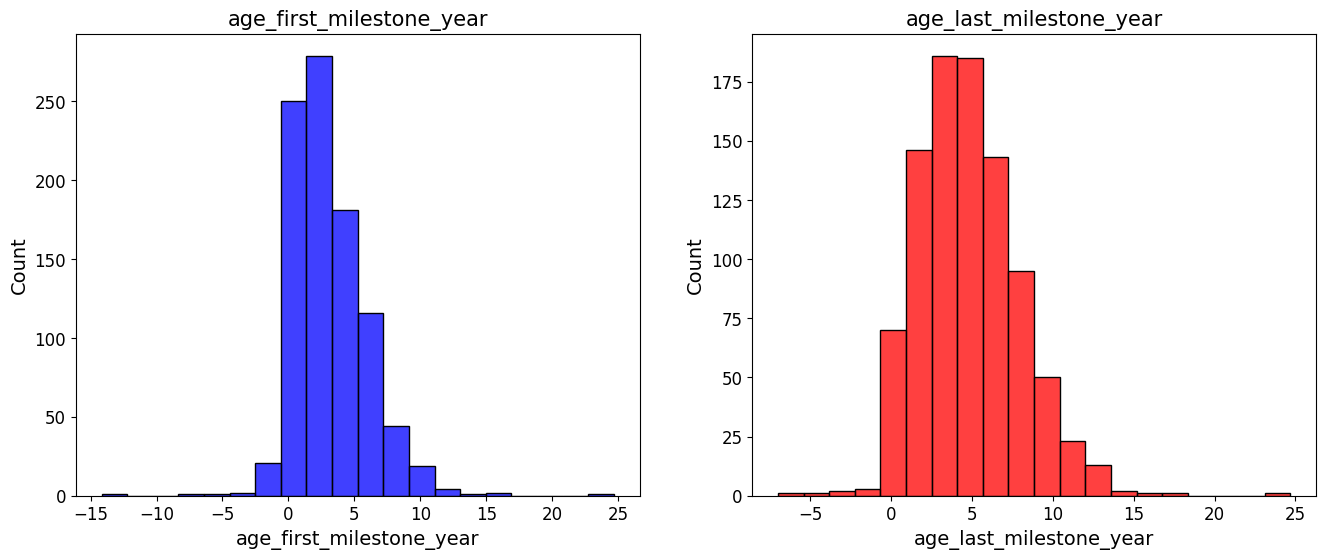

In [13]:
# looking at the columns with the missing values:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age_first_milestone_year'], bins=20, color='blue',ax=axes[0])
axes[0].set_title('age_first_milestone_year', fontsize=15)
axes[0].set_xlabel('age_first_milestone_year', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_first_milestone_year', ' skewness:', df['age_first_milestone_year'].skew(axis = 0, skipna = True) )
df['age_first_milestone_year'].describe(include='all')

sns.histplot(data=df['age_last_milestone_year'],bins=20, color='red',ax=axes[1])
axes[1].set_title('age_last_milestone_year', fontsize=15)
axes[1].set_xlabel('age_last_milestone_year', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.grid()
print('age_last_milestone_year', ' skewness:', df['age_last_milestone_year'].skew(axis = 0, skipna = True) )


# Get descriptive statistics
desc_first = df['age_first_milestone_year'].describe(include='all')
desc_last = df['age_last_milestone_year'].describe(include='all')

# Combine the statistics into a single DataFrame
desc_table = pd.DataFrame({
    'age_first_milestone_year': desc_first,
    'age_last_milestone_year': desc_last
})

# Display the table with tabulate
print(tabulate(desc_table, headers='keys', tablefmt='pretty'))


In order to fill in the missing values we used the basic knn algorithm. Then, we evaluated the effectiveness of the imputation process and assessed the quality of the imputed data by comparing summary statistics (e.g., mean, median, standard deviation) before and after the imputation. We see that the results are very much alike, so we can proceed.

In [14]:
#deal with different date formats
from datetime import datetime

dates_in_df = ['last_funding_at','first_funding_at','founded_at']

formatted_dates = []
formatted_dates_MONTH_DAY = []
formatted_dates_YEAR = []
for ind in dates_in_df:
    dates = df[ind]
    for date in dates:
        # Try to parse the date string as MM/DD/YYYY
        try:
            parsed_date = datetime.strptime(date, '%m/%d/%Y')
        # If it fails, assume the date string is in M/D/YYYY format
        except ValueError:
            parsed_date = datetime.strptime(date, '%m/%d/%Y')
        # Extract month and year from the parsed date
        day = parsed_date.strftime('%d')
        month = parsed_date.strftime('%m')
        year = parsed_date.strftime('%Y')
        # Combine month and year as a string in MM/YYYY format
        formatted_date_MONTH_DAY = f"{month}/{day}"
        formatted_dates_MONTH_DAY.append(formatted_date_MONTH_DAY)
        # year format only
        formatted_date_YEAR = f"{year}"
        formatted_dates_YEAR.append(formatted_date_YEAR)
        # Convert the parsed date back to a string in MM/DD/YYYY format
        formatted_date = parsed_date.strftime('%m/%d/%Y')
        formatted_dates.append(formatted_date)
               
     
    df[ind] = formatted_dates
    df[ind + 'MONTH/DAY'] = formatted_dates_MONTH_DAY
    df[ind + 'YEAR'] = formatted_dates_YEAR
    formatted_dates = []
    formatted_dates_MONTH_DAY = []
    formatted_dates_YEAR = []
df

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,...,has_roundD,avg_participants,is_top500,status,last_funding_atMONTH/DAY,last_funding_atYEAR,first_funding_atMONTH/DAY,first_funding_atYEAR,founded_atMONTH/DAY,founded_atYEAR
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,01/01/2007,NaN,04/01/2009,...,0,1.0000,0,acquired,01/01,2010,04/01,2009,01/01,2007
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,01/01/2000,NaN,02/14/2005,...,1,4.7500,1,acquired,12/28,2009,02/14,2005,01/01,2000
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,03/18/2009,NaN,03/30/2010,...,0,4.0000,1,acquired,03/30,2010,03/30,2010,03/18,2009
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,01/01/2002,NaN,02/17/2005,...,1,3.3333,1,acquired,04/25,2007,02/17,2005,01/01,2002
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,08/01/2010,10/1/2012,08/01/2010,...,0,1.0000,1,closed,04/01,2012,08/01,2010,08/01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1,01/01/2009,NaN,07/09/2009,...,0,6.0000,1,acquired,07/09,2009,07/09,2009,01/01,2009
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,0,01/01/1998,6/25/2008,04/01/2005,...,0,2.6667,1,closed,03/23,2007,04/01,2005,01/01,1998
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,0,01/01/1999,6/17/2012,06/29/2007,...,1,8.0000,1,closed,06/29,2007,06/29,2007,01/01,1999
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1,01/01/2009,NaN,10/05/2009,...,0,1.0000,1,acquired,11/01,2011,10/05,2009,01/01,2009


Some of the dates are with a format of M/D/YYYY and some are MM/DD/YYYY. We changed it such that all the data is MM/DD/YYYY. We've added some columns (like foundation year, foundation date [MM/DD], etc) using the different given date columns. The most common date in this data is 01/01, which is not very surprising since it’s usually the default value. For now, we ignore it.

In [15]:
dates_in_df = ['last_funding_atMONTH/DAY','first_funding_atMONTH/DAY','founded_atMONTH/DAY']
for ind in dates_in_df:
    date_counts = df[ind].value_counts()
    # print the most common dates
    print(date_counts.head())


last_funding_atMONTH/DAY
01/01    38
08/01    19
02/01    16
07/01    16
05/01    15
Name: count, dtype: int64
first_funding_atMONTH/DAY
01/01    86
02/01    32
12/01    32
08/01    31
05/01    30
Name: count, dtype: int64
founded_atMONTH/DAY
01/01    551
06/01     37
10/01     30
09/01     28
08/01     27
Name: count, dtype: int64


In [16]:
# category_counts = df['category_code'].value_counts()
# plt.figure(figsize=(10, 8))
# sns.barplot(x=category_counts.values, y=category_counts.index, palette='Set2')
# plt.title('Most Common Categories', fontsize=16)
# plt.xlabel('Count', fontsize=14)
# plt.ylabel('Category', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

We also saw an interesting thing in our data: we looked at the ratio of successful companies to unsuccessful companies in each year.

Since 2000, as the year progressed the ratio was pretty much decreasing.

status          acquired    closed  Success Ratio
founded_atYEAR                                   
1984                 NaN  1.000000       0.000000
1985                 NaN  1.000000       0.000000
1990                 NaN  1.000000       0.000000
1992                 NaN  1.000000       0.000000
1995                 NaN  1.000000       0.000000
1996                 NaN  1.000000       0.000000
1997                 NaN  1.000000       0.000000
1998                 NaN  1.000000       0.000000
1999                 NaN  1.000000       0.000000
2000            0.815385  0.184615       4.416667
2001            0.731707  0.268293       2.727273
2002            0.775862  0.224138       3.461538
2003            0.734375  0.265625       2.764706
2004            0.647887  0.352113       1.840000
2005            0.696078  0.303922       2.290323
2006            0.635514  0.364486       1.743590
2007            0.663462  0.336538       1.971429
2008            0.655172  0.344828       1.900000


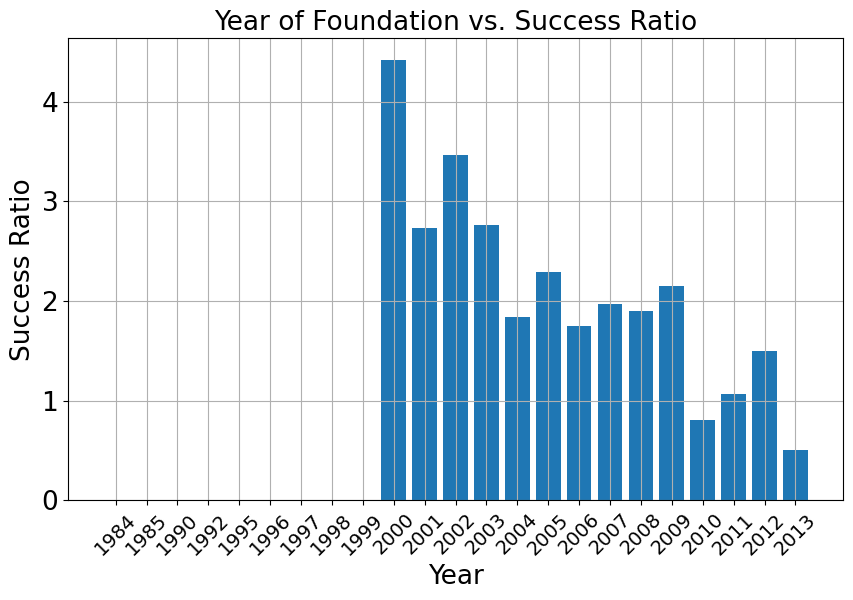

In [17]:
# looking for the ratio of succesful companies to unsuccessful companies in each year

# Group the DataFrame by 'year' and calculate the ratio of successful to unsuccessful companies
ratio_by_year = df.groupby('founded_atYEAR')['status'].value_counts(normalize=True).unstack()

# Calculate the ratio of successful to unsuccessful companies
ratio_by_year['Success Ratio'] = ratio_by_year['acquired'] / ratio_by_year['closed']

# Handle cases with only one company in a year
ratio_by_year.loc[ratio_by_year['closed'].isnull(), 'Success Ratio'] = 1.0
ratio_by_year.loc[ratio_by_year['acquired'].isnull(), 'Success Ratio'] = 0.0

# Fill remaining NaN ratios with meaningful information
ratio_by_year['Success Ratio'] = ratio_by_year['Success Ratio'].fillna('No Data')

# Print the resulting DataFrame
print(ratio_by_year)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(ratio_by_year.index, ratio_by_year['Success Ratio'])

# Customize the plot
plt.xlabel('Year', fontsize=19)
plt.ylabel('Success Ratio', fontsize=19)
plt.title('Year of Foundation vs. Success Ratio', fontsize=19)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=19)
plt.grid(True)
# Display the plot
plt.show()

### Split to nominal and numerical attributes

In [18]:
numeric_col = df.describe().columns # to get the numeric column
numeric_data = df[numeric_col]
nominal_data = df.drop(numeric_col, axis=1)
numeric_data

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,0,1,0,1,0,0,0,0,1.0000,0
1,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,0,1,0,0,1,1,1,4.7500,1
2,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,0,0,0,1,0,0,0,4.0000,1
3,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,0,0,0,1,1,1,3.3333,1
4,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,0,0,0,0,1,0,0,0,6.0000,1
919,42.504817,-71.195611,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,...,0,1,1,0,0,1,0,0,2.6667,1
920,37.408261,-122.015920,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,...,0,0,0,0,0,0,0,1,8.0000,1
921,37.556732,-122.288378,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,0,0,0,0,1,1,0,0,1.0000,1


We Created a folium map – a geographic interface – where we can see all the companies around the world, and we color coded it so that the successful companies are green colored, and the unsuccessful companies are red colored.

In [19]:
# Create a folium map centered on the first location in the dataframe
map = folium.Map(location=[numeric_data['latitude'][0], numeric_data['longitude'][0]], zoom_start=5)

for i in range(len(numeric_data)):
    popup_text = f"{df['status'][i]} "
    if df['status'][i] == 'acquired':
        c = 'green'
    else:# Target = closed
        c = 'red'

    folium.Marker([numeric_data['latitude'][i], numeric_data['longitude'][i]],
        icon=folium.Icon(color=c,popup = popup_text), icon_size=(70, 70)).add_to(map)
    
# Display the map
map


We used cross-tabulation (crosstab) table to show that most of the companies are in CA and 2/3 of them were successful. So, it might be an indication that there's a strong connection between the companies location and their chance to succeed. We then show a similar connection using in_Top500 column.

In [20]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status'], columns=[df['is_NY'],df['is_MA'], df['is_CA'], df['is_TX'],df['is_otherstate']])
ct

is_NY          0                     1
is_MA          0                 1   0
is_CA          0             1   0   0
is_TX          0        1    0   0   0
is_otherstate  0    1   0    0   0   0
status                                
acquired       0  101  23  332  64  77
closed         1  103  19  155  19  29

In [21]:
# cross-tabulation (crosstab) table
ct = pd.crosstab(index=df['status'], columns=[df['is_top500']])
ct

is_top500,0,1
status,,
acquired,60,537
closed,116,210


We noticed, using boxplot, that in funding_total_usd column we have outliers. We found that there was one company that raised a lot of money, compared to the other companies. We decided to use log data transformation. 

<Axes: ylabel='funding_total_usd'>

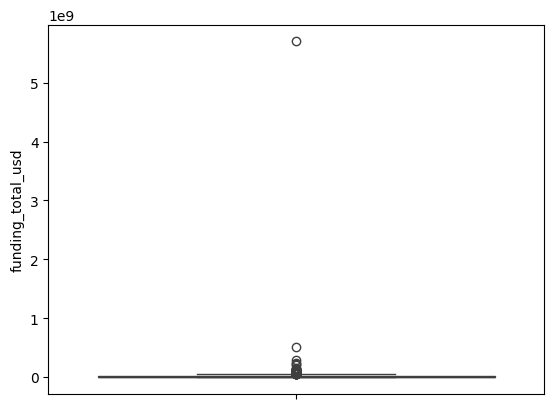

In [22]:
sns.boxplot(y="funding_total_usd", data=numeric_data)

In [23]:
# outliers:
data_mean = df['funding_total_usd'].mean()
data_std = df['funding_total_usd'].std()
cut_off = data_std * 3
lower_bound = data_mean - cut_off
upper_bound = data_mean + cut_off
df.loc[(df['funding_total_usd'] > upper_bound) | (df['funding_total_usd'] < lower_bound)]

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,...,has_roundD,avg_participants,is_top500,status,last_funding_atMONTH/DAY,last_funding_atYEAR,first_funding_atMONTH/DAY,first_funding_atYEAR,founded_atMONTH/DAY,founded_atYEAR
364,WA,30.63248,-86.984345,98033,Kirkland,Clearwire,1,10/01/2003,NaN,05/06/2008,...,0,4.25,1,acquired,02/27,2013,05/06,2008,10/01,2003


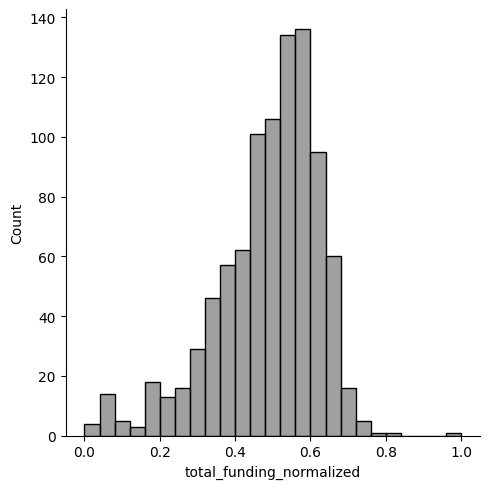

In [24]:
from sklearn.preprocessing import MinMaxScaler

df['funding_total_usd_log'] = np.log(df['funding_total_usd'])
scaler = MinMaxScaler()
df['total_funding_normalized'] = scaler.fit_transform(df[['funding_total_usd_log']])


# df[['funding_total_usd','total_funding_normalized']].head()
sns.displot(df['total_funding_normalized'], bins=25, color='gray')


<Axes: ylabel='total_funding_normalized'>

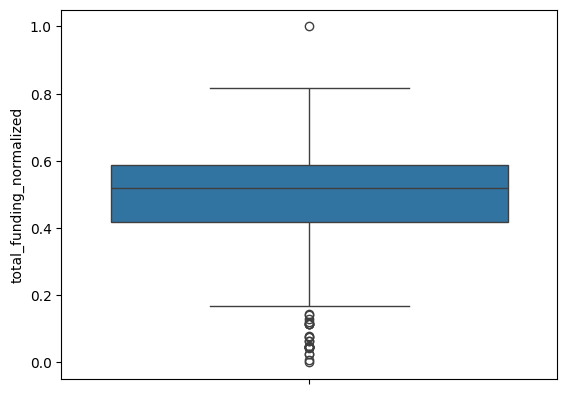

In [25]:
sns.boxplot(y="total_funding_normalized", data=df)

Preprocess:

In [26]:
# Handle missing values
df = df.fillna(method='ffill')

C:\Users\oralo\AppData\Local\Temp\ipykernel_84632\132356397.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [27]:
# Encode categorical features
# le = LabelEncoder()
# df['SomethingSomething'] = le.fit_transform(df['SomethingSomething'])

In [28]:
df.info() # after preprocess

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_code                 923 non-null    object 
 1   latitude                   923 non-null    float64
 2   longitude                  923 non-null    float64
 3   zip_code                   923 non-null    object 
 4   city                       923 non-null    object 
 5   name                       923 non-null    object 
 6   labels                     923 non-null    int64  
 7   founded_at                 923 non-null    object 
 8   closed_at                  919 non-null    object 
 9   first_funding_at           923 non-null    object 
 10  last_funding_at            923 non-null    object 
 11  age_first_funding_year     923 non-null    float64
 12  age_last_funding_year      923 non-null    float64
 13  age_first_milestone_year   923 non-null    float64

Visualization:

C:\Users\oralo\AppData\Local\Temp\ipykernel_84632\1619564235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')


Text(0, 0.5, 'Number of Startups')

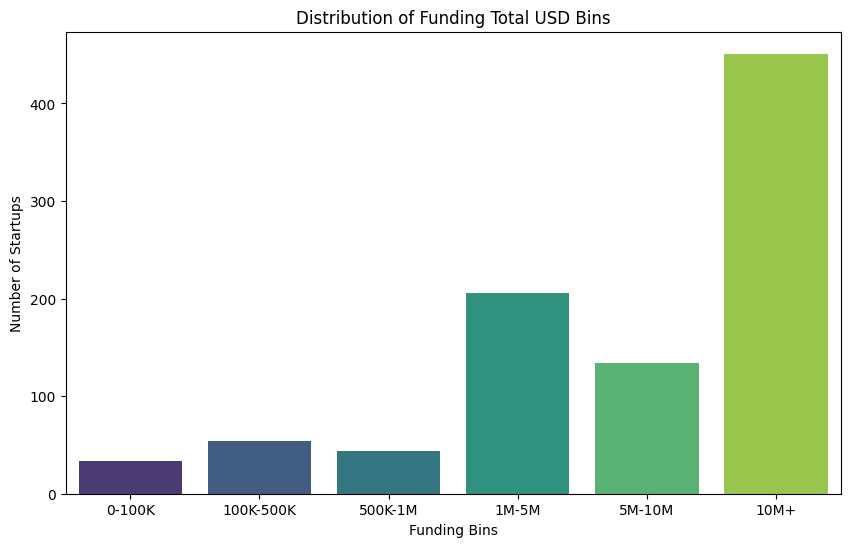

In [42]:
# plot funding bins using a bar plot
bin_edges = [0, 100000, 500000, 1000000, 5000000, 10000000, df['funding_total_usd'].max()] # binning funding_total_usd- i use this since histplot was unclear
bin_labels = ['0-100K', '100K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
df['funding_bins'] = pd.cut(df['funding_total_usd'], bins=bin_edges, labels=bin_labels, include_lowest=True)

funding_bin_counts = df['funding_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=funding_bin_counts.index, y=funding_bin_counts.values, palette='viridis')
plt.title('Distribution of Funding Total USD Bins')
plt.xlabel('Funding Bins')
plt.ylabel('Number of Startups')


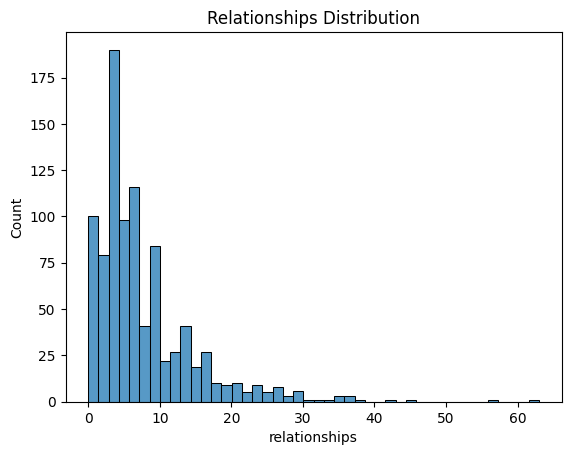

In [ ]:
sns.histplot(df['relationships'])
plt.title('Relationships Distribution')
plt.show()

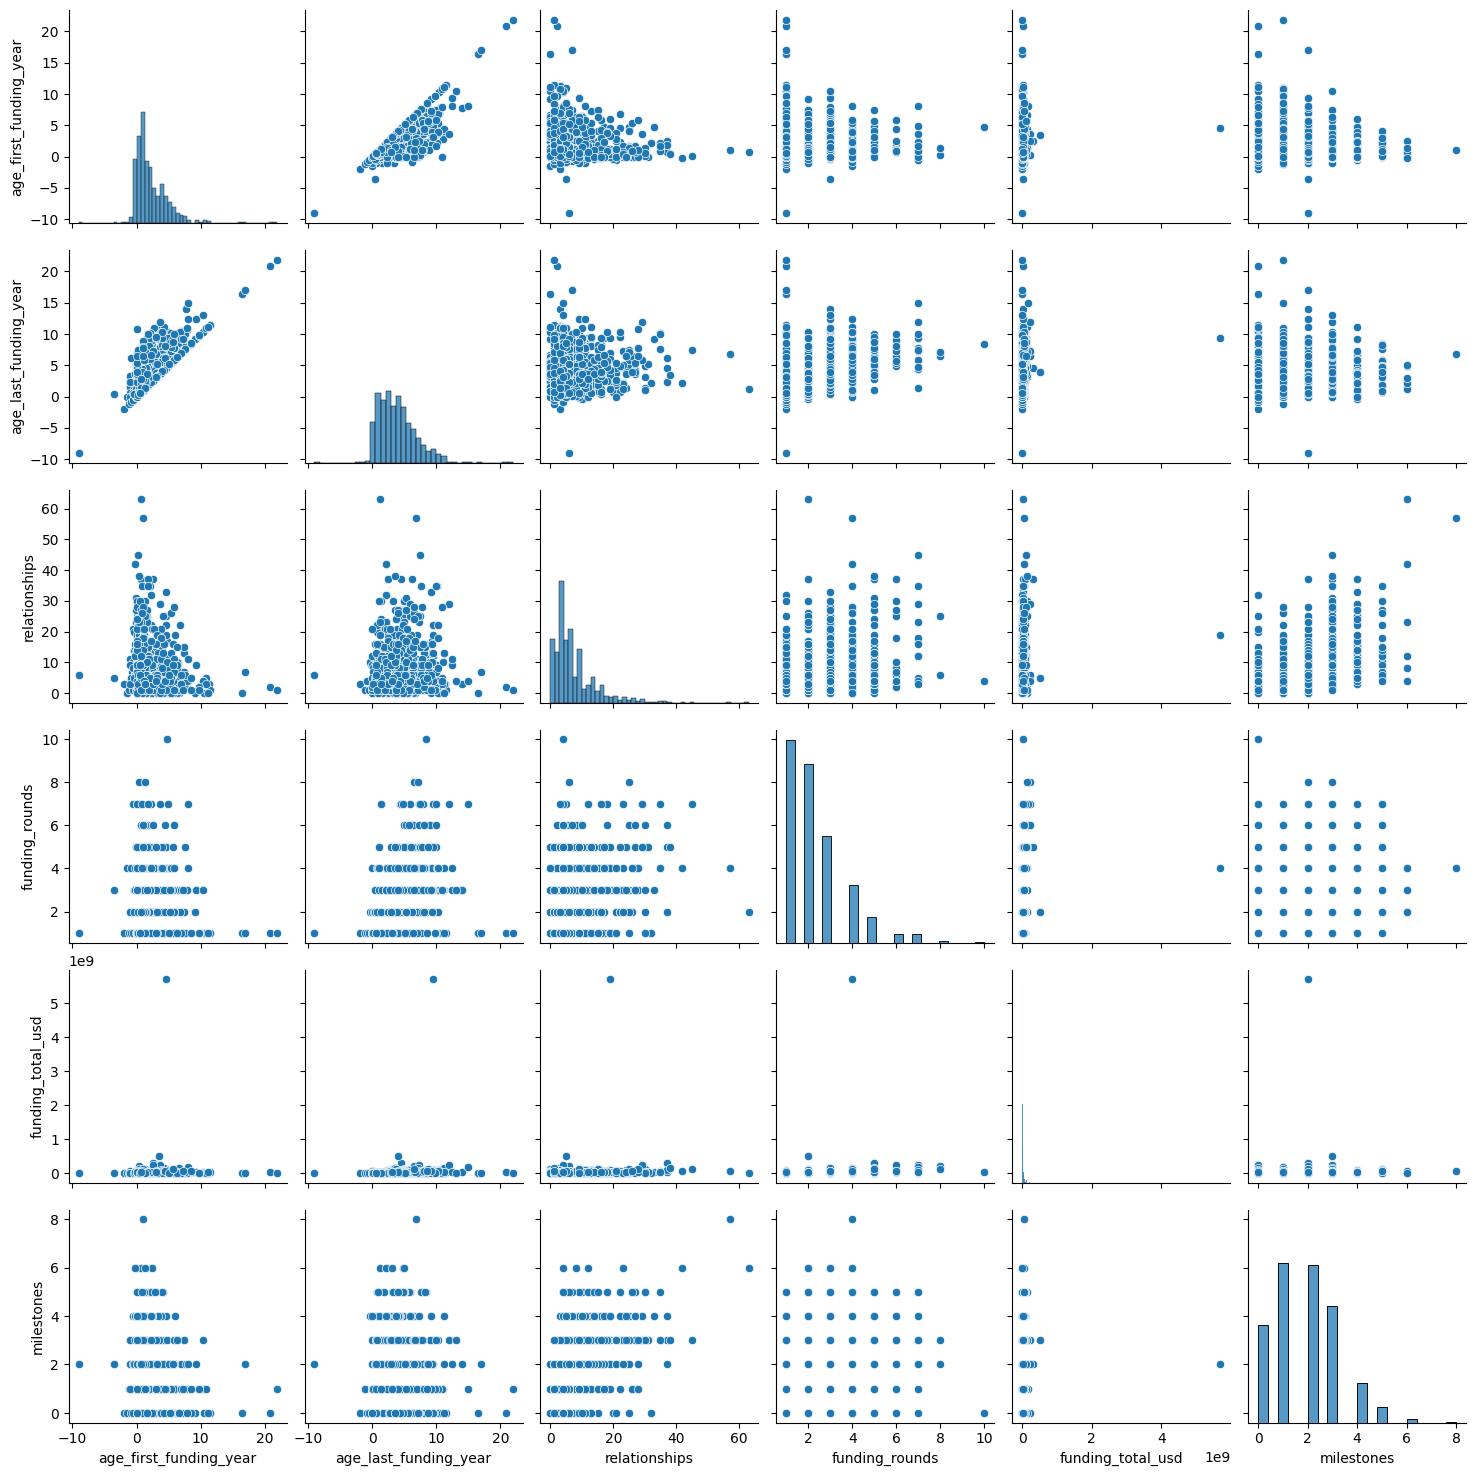

In [ ]:
# Pair plot
sns.pairplot(df[['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones']])
plt.show()


C:\Users\oralo\AppData\Local\Temp\ipykernel_46148\2808052165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Startup Status')

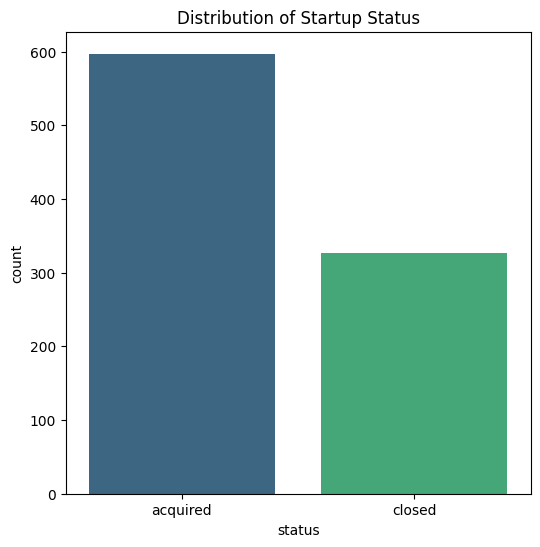

In [ ]:
# Distribution of status
plt.figure(figsize=(6, 6))
sns.countplot(x='status', data=df, palette='viridis')
plt.title('Distribution of Startup Status')


C:\Users\oralo\AppData\Local\Temp\ipykernel_46148\3078408039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y='funding_rounds', data=df, palette='viridis')


Text(0.5, 1.0, 'Funding Rounds Distribution by Status')

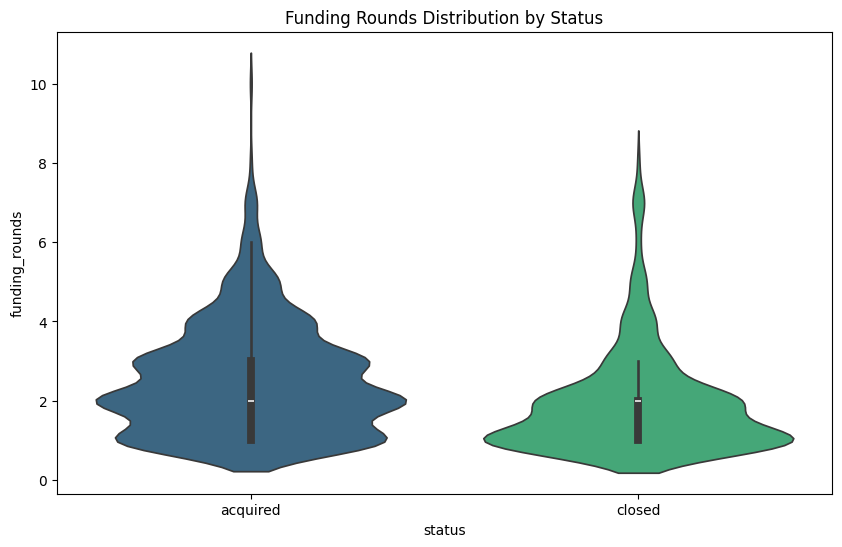

In [ ]:
# Violin plot for funding rounds distribution by status
plt.figure(figsize=(10, 6))
sns.violinplot(x='status', y='funding_rounds', data=df, palette='viridis')
plt.title('Funding Rounds Distribution by Status')
